### Surprise House Case Study

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score #for calculating the r-square value
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set display options to show all rows and columns
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Step 1 : Get Data

In [3]:
housingData  = pd.read_csv("train.csv")
housingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
## Data Information
housingData.info()
# The provided dataset consists of 1460 entries (rows) and 81 columns. 
# The dataset includes a combination of float, integer, and object data types. It doe contain any missing values in
# different columns,as indicated by the "Non-Null Count" for all columns vs the total counts of rows available.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housingData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housingDataTemp = housingData;
housingData = housingDataTemp.drop("Id",axis=1,inplace=False)
housingData.shape

(1460, 80)

In [7]:
# Separating the Numerical and Categorical features for analysis
numColumns = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
             '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch'
              ,'3SsnPorch','ScreenPorch','PoolArea','MiscVal']

catColumns = [col for col in housingData.columns if col not in numColumns]

# Remove Target Variable 
targetColumn  = 'SalePrice'
catColumns.remove(targetColumn)

print(numColumns)
print(catColumns) 

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'P

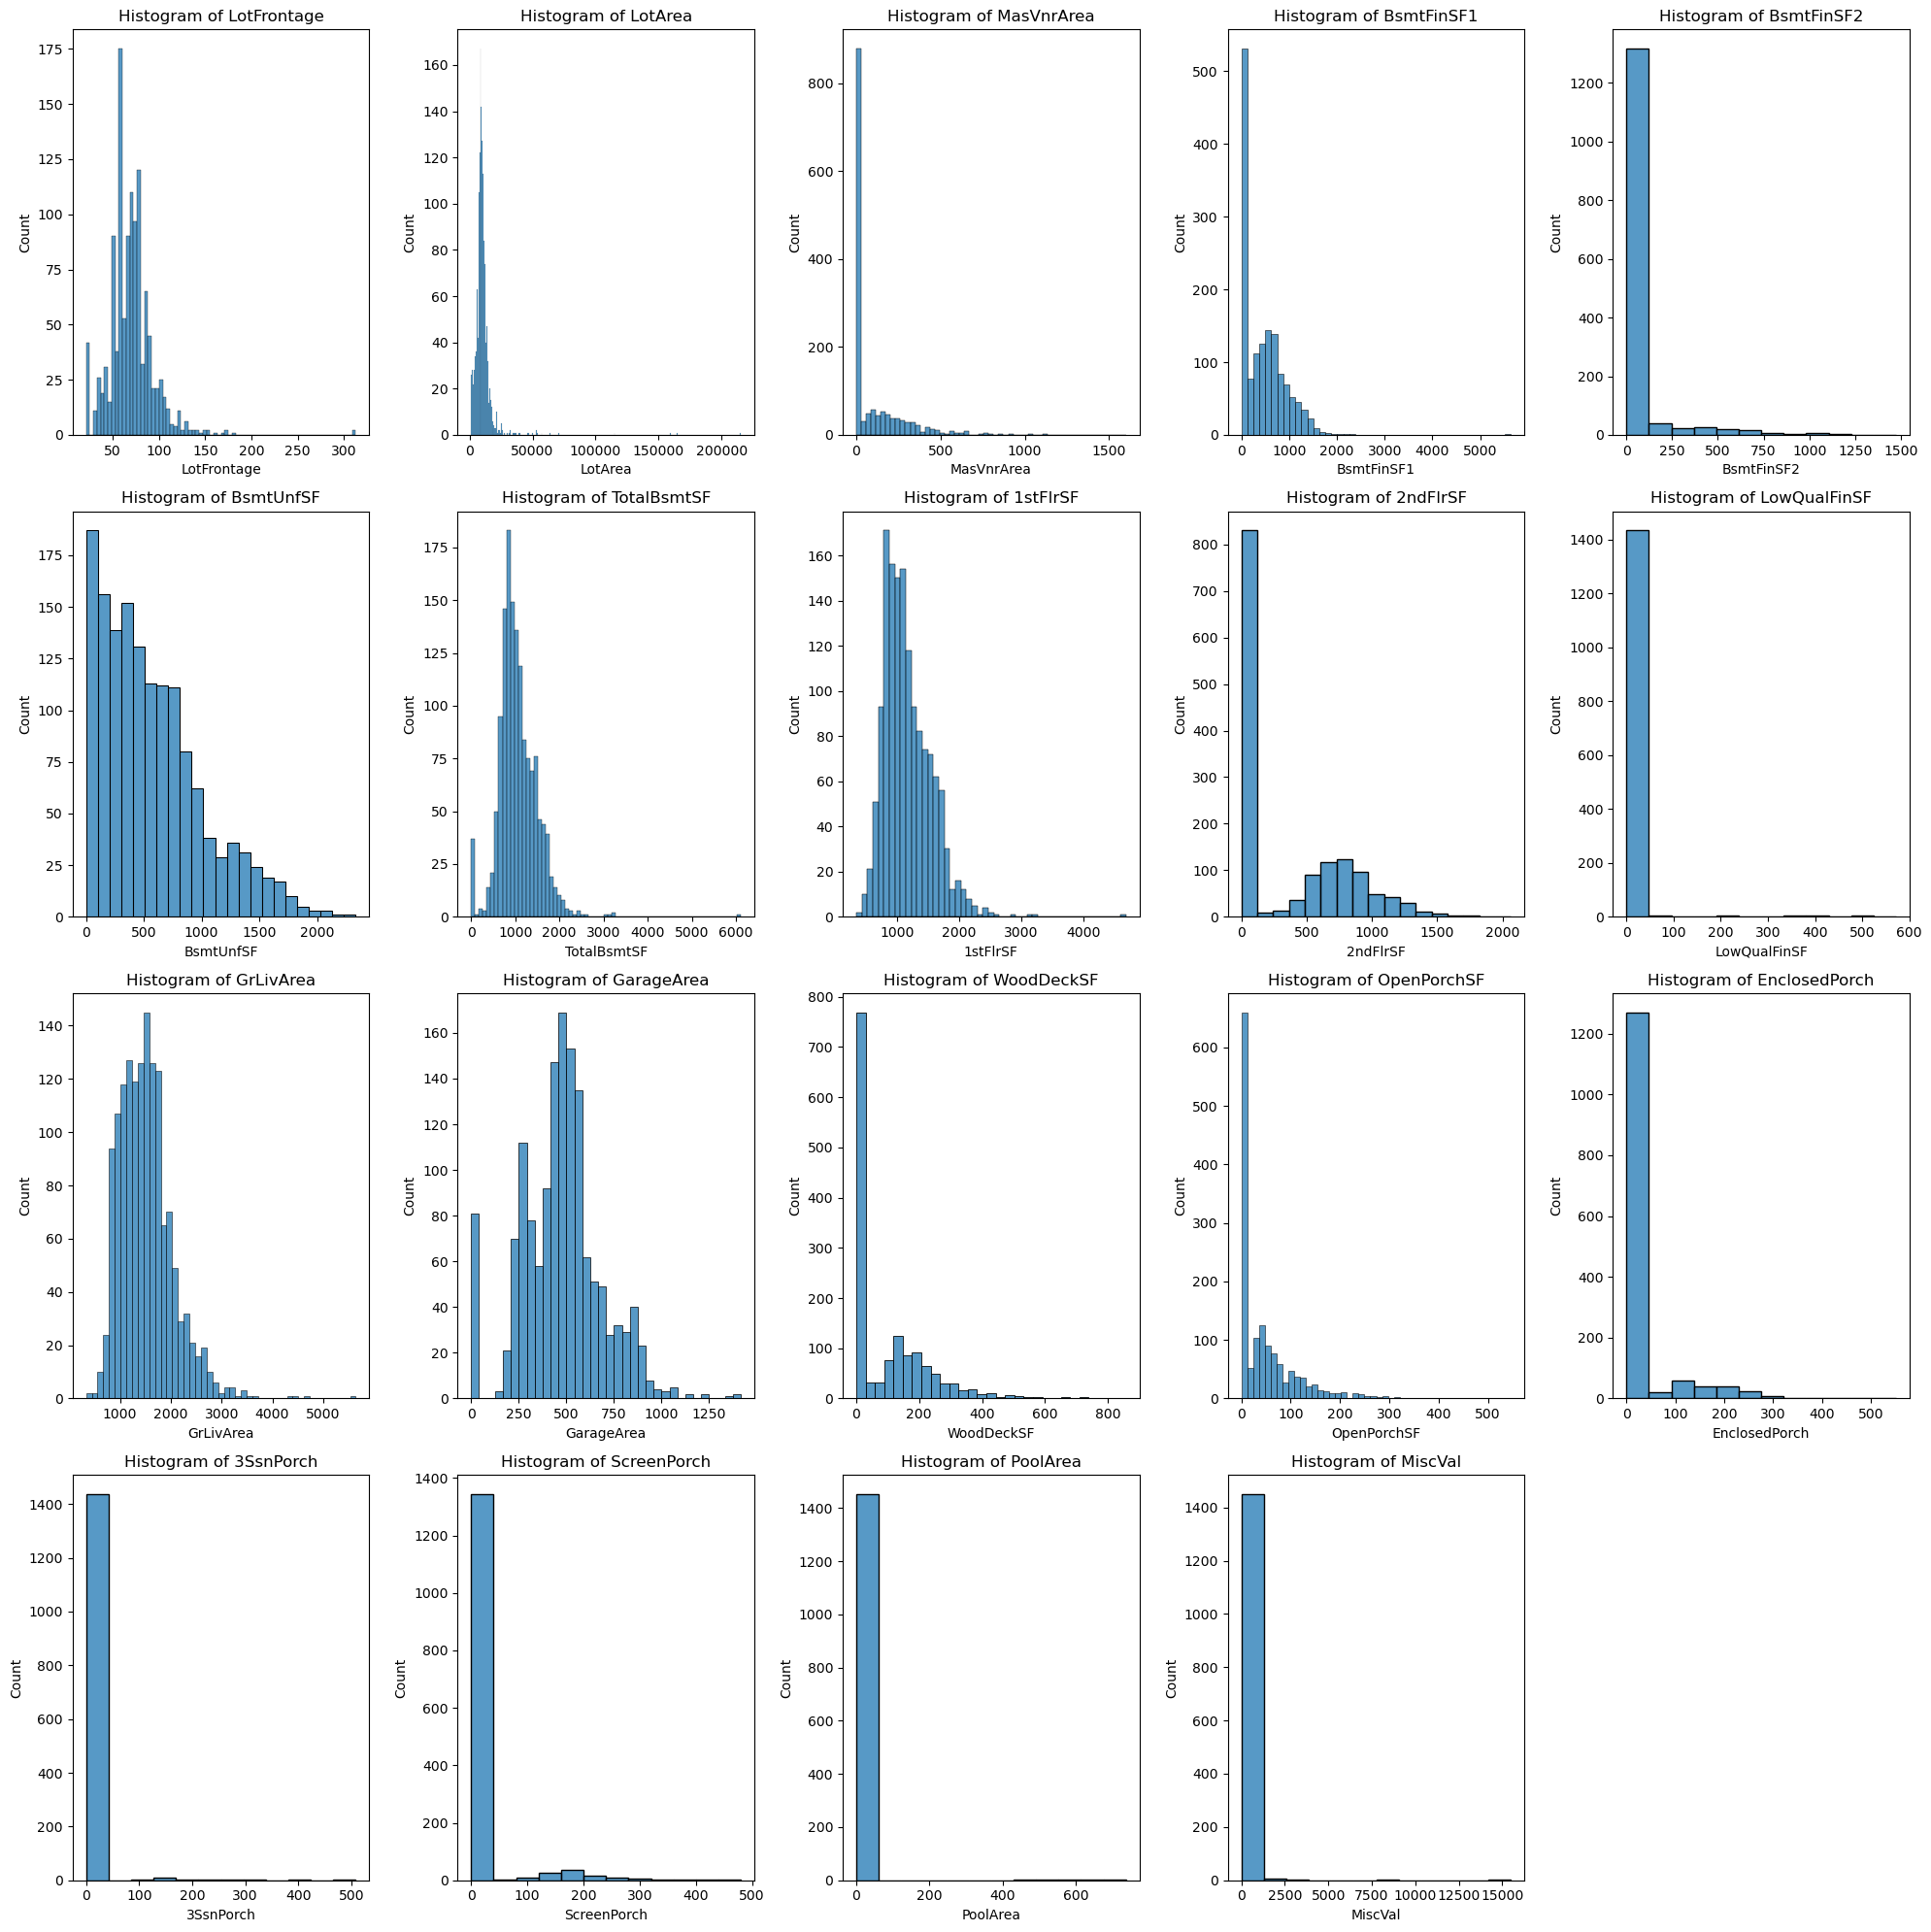

In [8]:
# Lets First Look the distribution of the numerical
# Calculate the number of rows and columns needed
num_columns = 5
num_rows = math.ceil(len(housingData[numColumns].columns) / num_columns)

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_columns*num_rows))

# Iterate over each column and create a separate histogram
for i, column in enumerate(housingData[numColumns].columns):
    row = i // num_columns
    col = i % num_columns
    
    # Select the appropriate subplot
    if num_rows > 1:
        ax = axes[row][col]
    else:
        ax = axes[col]
    
    # Create the histogram using seaborn
    sns.histplot(data=housingData[numColumns], x=column, ax=ax)
    ax.set_title(f'Histogram of {column}')

# Remove any empty subplots
if len(housingData[numColumns].columns) < num_rows * num_columns:
    empty_subplots = num_rows * num_columns - len(housingData[numColumns].columns)
    if num_rows > 1:
        for i in range(empty_subplots):
            fig.delaxes(axes[-1][-1-i])
    else:
        for i in range(empty_subplots):
            fig.delaxes(axes[-1-i])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


- Looking at the histogram of above columns , it seems that few of the fields have data skewed toward one side  or in an uneven pattern
- Few of the columns seems to have max records pointed towards single value , we need to look indepth for 
 such cols top understand and take relevant action :
- ['LowQualFinSF',3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [9]:
def deleteColumns(colArray):         
        global numColumns, catColumns,housingData
        numColumns = [col for col in numColumns if col not in colArray]
        catColumns = [col for col in catColumns if col not in colArray]
        housingData.drop(colArray,axis=1 , inplace=True)

In [10]:
skewedCols = ['LowQualFinSF', '3SsnPorch','ScreenPorch','EnclosedPorch',
                            'PoolArea','BsmtFinSF2','BsmtHalfBath', 'MiscVal']
for column in skewedCols:
    value_counts = housingData[column].value_counts(normalize=True)
    highest_percentage = value_counts.max()
    highest_percentage_values = value_counts[value_counts == highest_percentage].index
    print(f"For column '{column}':")
    print(f"Highest percentage: {highest_percentage}")
    print(f"Value with highest percentage: {highest_percentage_values}")
    print()

For column 'LowQualFinSF':
Highest percentage: 0.9821917808219178
Value with highest percentage: Int64Index([0], dtype='int64')

For column '3SsnPorch':
Highest percentage: 0.9835616438356164
Value with highest percentage: Int64Index([0], dtype='int64')

For column 'ScreenPorch':
Highest percentage: 0.9205479452054794
Value with highest percentage: Int64Index([0], dtype='int64')

For column 'EnclosedPorch':
Highest percentage: 0.8575342465753425
Value with highest percentage: Int64Index([0], dtype='int64')

For column 'PoolArea':
Highest percentage: 0.9952054794520548
Value with highest percentage: Int64Index([0], dtype='int64')

For column 'BsmtFinSF2':
Highest percentage: 0.8856164383561644
Value with highest percentage: Int64Index([0], dtype='int64')

For column 'BsmtHalfBath':
Highest percentage: 0.9438356164383561
Value with highest percentage: Int64Index([0], dtype='int64')

For column 'MiscVal':
Highest percentage: 0.9643835616438357
Value with highest percentage: Int64Index([0]

In [11]:
# It is visible that maximum records of these columns are of 0 value and would not add any value to our model , we need to drop 
# them 
# housingDataTemp = housingData
# numColumns = [col for col in numColumns if col not in skewedCols] 
# housingData = housingDataTemp.drop(skewedCols,axis=1 , inplace=False)
deleteColumns(skewedCols)
housingData.shape

(1460, 72)

## Step 2  :  Missing Values

In [12]:
def getPercentageWithMissingValues(housingData):
    columnsWithMissingValue = (housingData.isnull().sum() / housingData.isnull().count()*100).sort_values(ascending = False) 
    columnsWithMissingValue =columnsWithMissingValue[columnsWithMissingValue>0]
    return columnsWithMissingValue

In [13]:
## Lets first Capture all columns with na values  
columnsWithNa = getPercentageWithMissingValues(housingData)
print(columnsWithNa)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


In [14]:
### Lets Drop Fiels With Missing Value > 80%
colsToDelete = ["PoolQC","MiscFeature","Alley","Fence"] 
deleteColumns(colsToDelete)
housingData.shape

(1460, 68)

In [15]:
columnsWithNa = getPercentageWithMissingValues(housingData)
# print(columnsWithNa)
# ## Lets look each of the columns distinct values to understand what type of values are present in differnt columns
# for column in columnsWithNa:
#     print(column)
# #     distinct_values = housingData[column].unique()
# #     print(f"Distinct values in {column}: {distinct_values}")

In [16]:
# If you look at the above distinct values, it is visible that there is nan category in few of the columns which actually 
# is one of the values specified based on Data Dictionary but labelling them NA makes them counted as empty values

# NA mentioned for GarageFinish, GarageQual,GarageCond, GarageType is No Garage 
# NA mentioned for PoolQC is No Pool  
# NA mentioned for Fence is No Fence  
# NA mentioned for MiscFeature is None  
# NA mentione for Alley is No Alley Access   
# NA mentioned for FireplaceQu is No Fireplace
# NA mentioned for BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtQual,BsmtCond is No Basement     

# All the Above columns NA Value can be represented as None for our Purpose , lets do it 
columnsValuetoReplace = ['GarageFinish','GarageQual','GarageCond','GarageType',
                         'BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtQual','BsmtCond'
                         ,'FireplaceQu']
housingData[columnsValuetoReplace] = housingData[columnsValuetoReplace].applymap(lambda x: 'None' if pd.isna(x) else x)

# Numeric Field , so need to be set as 0. This is specified Na for cases where garage does not exist

housingData['GarageYrBlt'] = housingData['GarageYrBlt'].apply(lambda x: 0 if pd.isna(x) else x) 


#For LotFrontage , it is Linear feet of street connected to property and can be considered as 0 if no value present
housingData['LotFrontage'] = housingData['LotFrontage'].apply(lambda x: 0 if pd.isna(x) else x)
# For MasVnrType,MasVnrArea since the records are too small and there is a value of 'None' mentioned for them 
# in data dictiory , lets put the same as the missing value 
housingData['MasVnrType'] = housingData['MasVnrType'].apply(lambda x: 'None' if pd.isna(x) else x)
housingData['MasVnrArea'] = housingData['MasVnrArea'].apply(lambda x: 0 if pd.isna(x) else x)
# For Electrical , we will input median value as missing value
housingData['Electrical'] = housingData['Electrical'].fillna(housingData['Electrical'].mode().iloc[0])

## Checking again Missing Values
getPercentageWithMissingValues(housingData)
## No Missing Value Found

Series([], dtype: float64)

In [17]:
housingData['GarageFinish'].value_counts()

Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64

## Step 3 : Identify Outliers

In [18]:
len(housingData[numColumns].columns)

12

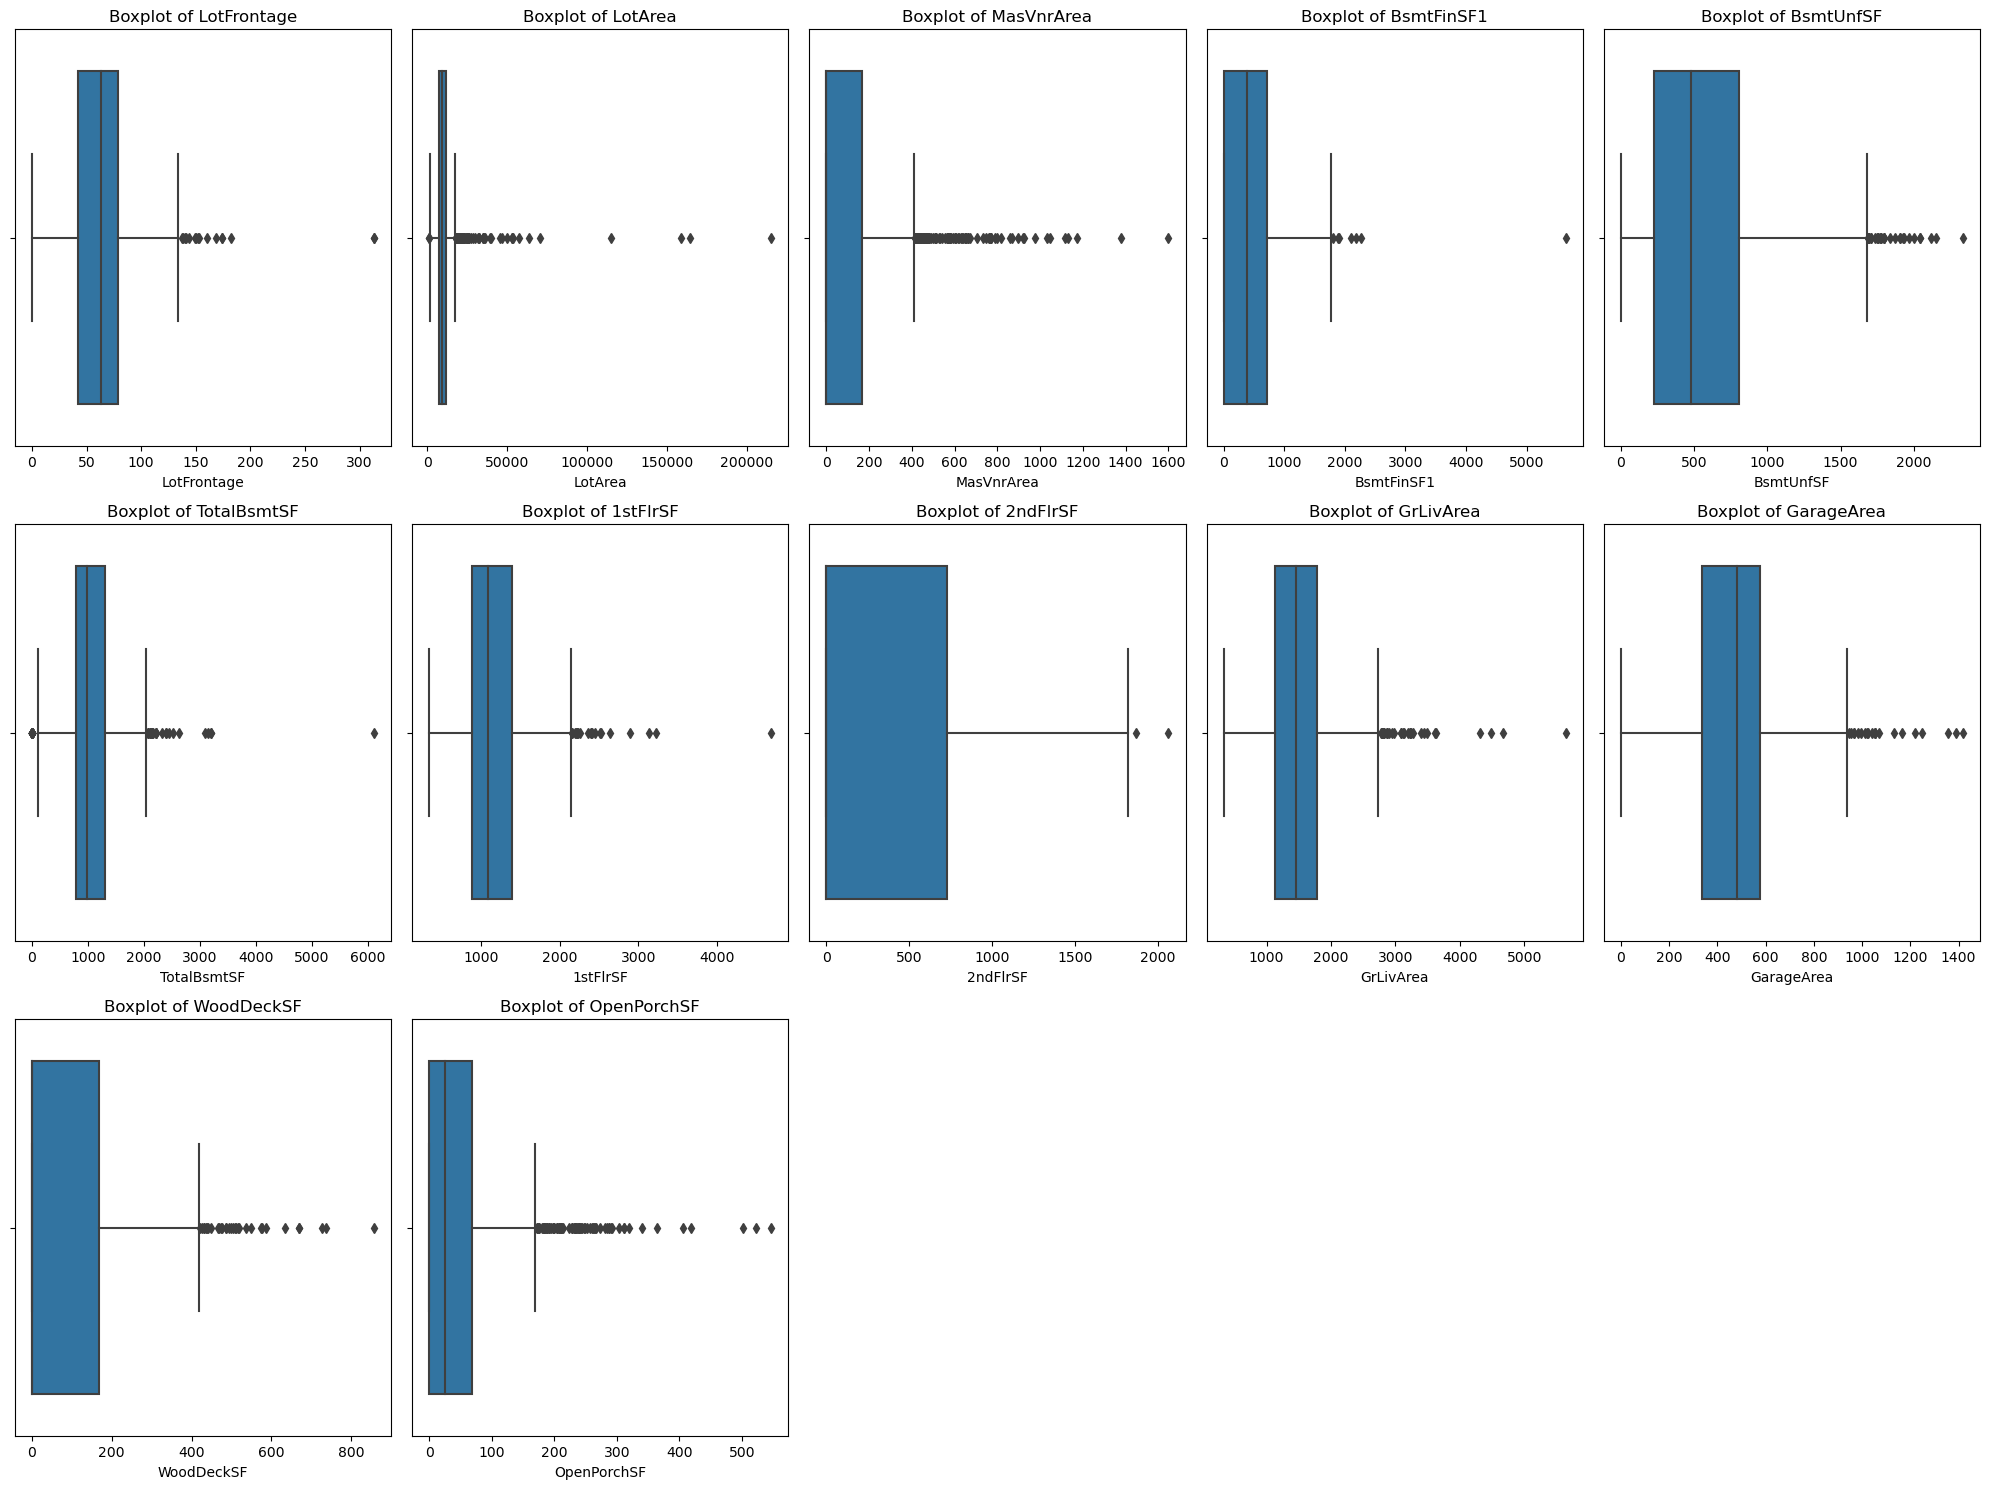

In [19]:
# Lets try to identify outliers using box plot
# Calculate the number of rows and columns needed
num_columns = 5
num_rows = math.ceil(len(housingData[numColumns].columns) / num_columns)

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_columns*num_rows))

# Iterate over each column and create a separate boxplot
for i, column in enumerate(housingData[numColumns].columns):
    row = i // num_columns
    col = i % num_columns
    
    # Select the appropriate subplot
    if num_rows > 1:
        ax = axes[row][col]
    else:
        ax = axes[col]
    
    # Create the boxplot using seaborn
    sns.boxplot(data=housingData[numColumns], x=column, ax=ax)
    ax.set_title(f'Boxplot of {column}')

# Remove any empty subplots
if len(housingData[numColumns].columns) < num_rows * num_columns:
    empty_subplots = num_rows * num_columns - len(housingData[numColumns].columns)
    if num_rows > 1:
        for i in range(empty_subplots):
            fig.delaxes(axes[-1][-1-i])
    else:
        for i in range(empty_subplots):
            fig.delaxes(axes[-1-i])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

 - Since there are a lot of fields , its tough to see them individually for identifying the outliers but looking at the  charts above , it seems true that there are outliers that needs to be identified and fix 

In [20]:
outliers_percentage={}

for feature in housingData[numColumns].columns:
    Q1 = np.nanquantile(housingData[feature], 0.25)
    Q3 = np.nanquantile(housingData[feature], 0.75)
    IQR = Q3 - Q1    
    outliers_count = housingData[(housingData[feature] > (Q3 + 1.5 * IQR))
                                 | (housingData[feature] < (Q1 - 1.5 * IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/housingData.shape[0]*100,2)

outlier_df = pd.DataFrame({'Features': list(outliers_percentage.keys()), 'Percentage': list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False, inplace=True)
outlier_df = outlier_df[outlier_df['Percentage']>0]
print(outlier_df)

       Features  Percentage
2    MasVnrArea        6.71
11  OpenPorchSF        5.27
1       LotArea        4.73
5   TotalBsmtSF        4.18
10   WoodDeckSF        2.19
8     GrLivArea        2.12
4     BsmtUnfSF        1.99
9    GarageArea        1.44
6      1stFlrSF        1.37
0   LotFrontage        1.10
3    BsmtFinSF1        0.48
7      2ndFlrSF        0.14


- Since majority of the fields have outliers , we will change max and min value based onthe range of ( 25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR )

In [21]:
for feature,percentage in outliers_percentage.items():
        IQR = housingData[feature].quantile(.75) - housingData[feature].quantile(.25) 
        max_value = housingData[feature].quantile(.75)+1.5*IQR
        min_value = housingData[feature].quantile(.25)-1.5*IQR
        housingData[feature][housingData[feature] > max_value] = max_value
        housingData[feature][housingData[feature] < min_value ] = min_value

housingData[numColumns].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.187671,9647.388014,89.406336,439.997517,563.777740,1050.254795,1157.018151,346.789041,1503.735873,470.670719,91.806849,42.603425
std,32.938522,3594.356399,134.017553,433.219435,431.710214,397.937878,362.583002,435.791621,481.375641,207.105729,116.658120,52.501584
min,0.000000,1481.500000,0.000000,0.000000,0.000000,42.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000
25%,42.000000,7553.500000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,334.500000,0.000000,0.000000
50%,63.000000,9478.500000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,480.000000,0.000000,25.000000
75%,79.000000,11601.500000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,576.000000,168.000000,68.000000
max,134.500000,17673.500000,410.625000,1780.625000,1685.500000,2052.000000,2155.125000,1820.000000,2747.625000,938.250000,420.000000,170.000000


### Data Transformation

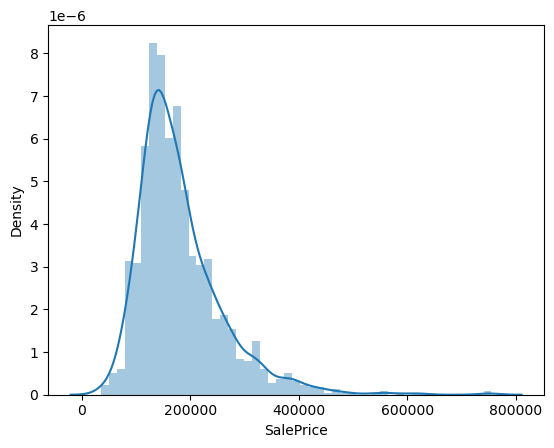

In [22]:
#SalePrice column
sns.distplot(housingData['SalePrice'])
plt.show()

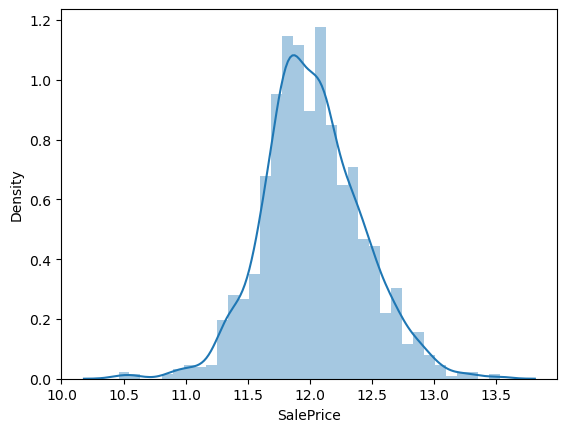

In [23]:
#Log transformation of SalePrice column to reduce skewness
housingData['SalePrice'] = np.log(housingData['SalePrice'])
sns.distplot(housingData['SalePrice'])
plt.show()

## Step 4 -  Understanding Correlation for Numerical Fields

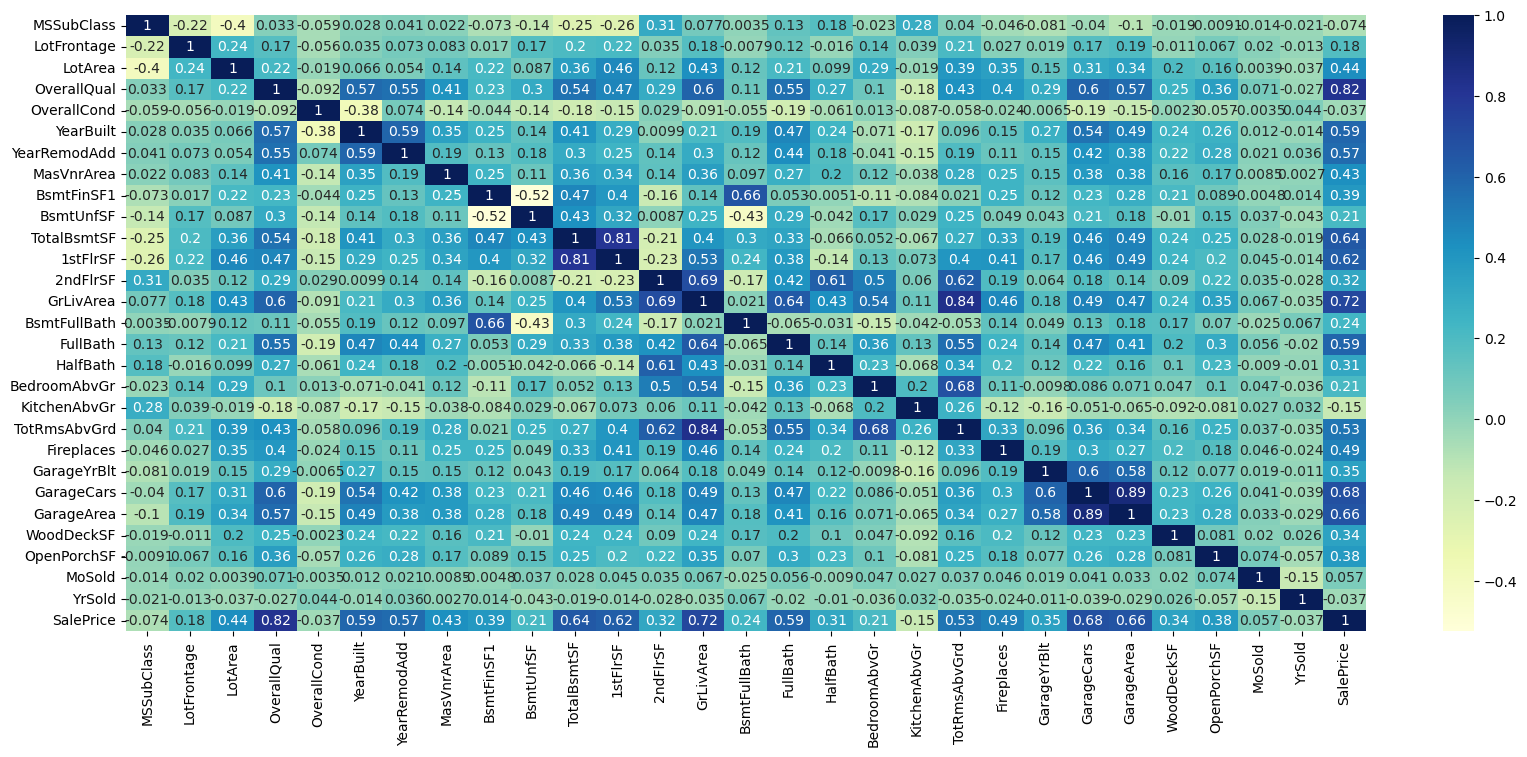

In [24]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(housingData.corr(),annot=True,cmap="YlGnBu",ax=ax)
plt.show()

In [25]:
import numpy as np

# Create the correlation matrix
correlation_matrix = housingData.corr()

# Get the indices of correlations higher than 0.8
row_indices, col_indices = np.where(np.abs(correlation_matrix) > 0.8)

# Create a list of correlated feature pairs and their values
correlated_features = []
for i in range(len(row_indices)):
    if row_indices[i] != col_indices[i]:
        feature1 = correlation_matrix.index[row_indices[i]]
        feature2 = correlation_matrix.columns[col_indices[i]]
        correlation_value = correlation_matrix.iloc[row_indices[i], col_indices[i]]
        correlated_features.append((feature1, feature2, correlation_value))

# Print the correlated feature pairs and their values
for feature1, feature2, correlation_value in correlated_features:
    print(f"Correlated features: {feature1} and {feature2} (Correlation value: {correlation_value})")


Correlated features: OverallQual and SalePrice (Correlation value: 0.8171844179216803)
Correlated features: TotalBsmtSF and 1stFlrSF (Correlation value: 0.8071577034861669)
Correlated features: 1stFlrSF and TotalBsmtSF (Correlation value: 0.8071577034861669)
Correlated features: GrLivArea and TotRmsAbvGrd (Correlation value: 0.835567760550734)
Correlated features: TotRmsAbvGrd and GrLivArea (Correlation value: 0.835567760550734)
Correlated features: GarageCars and GarageArea (Correlation value: 0.8927543469243738)
Correlated features: GarageArea and GarageCars (Correlation value: 0.8927543469243738)
Correlated features: SalePrice and OverallQual (Correlation value: 0.8171844179216803)


In [26]:
# Lets drop one of the above Features to remove correlations 
# TotalBsmtSF and 1stFlrSF  , This is basement Sq ft area and IstFloor Sq Ft Area , keeping TotalBsmtSF  
featuresToRemove = ['1stFlrSF','TotRmsAbvGrd','GarageCars']
deleteColumns(featuresToRemove)
# numColumns = [col for col in numColumns if col not in featuresToRemove]
# housingDataTemp = housingData
# housingData = housingDataTemp.drop(featuresToRemove, axis=1,inplace=False)
# housingData.shape

## Step 5  Univariate Analysis

### Grouping Columns

We can classify all the information provided in below groups and will be picking few of the groups that seems to be important 
for doing the analysis

- Group 1: Dwelling Information
    - MSSubClass
    - BldgType
    - HouseStyle

- Group 2: Location Information
    - MSZoning
    - Neighborhood

- Group 3: Lot Information
    - LotFrontage
    - LotArea
    - LotShape

- Group 4: Road and Alley Access
    - Street
    - Alley

- Group 5: Property Shape and Contour
    - LandContour
    - LotConfig
    - LandSlope

- Group 6: Utilities and Heating
    - Utilities
    - Heating
    - HeatingQC

- Group 7: Building Exterior
    - Exterior1st
    - Exterior2nd
    - MasVnrType
    - MasVnrArea
    - ExterQual
    - ExterCond

- Group 8: Basement Information
    - BsmtQual
    - BsmtCond
    - BsmtExposure
    - BsmtFinType1
    - BsmtFinSF1
    - BsmtFinType2
    - BsmtFinSF2
    - BsmtUnfSF
    - TotalBsmtSF

- Group 9: Garage Information
    - GarageType
    - GarageYrBlt
    - GarageFinish
    - GarageCars
    - GarageArea
    - GarageQual
    - GarageCond

- Group 10: Other Features
    - PoolArea
    - PoolQC
    - Fence
    - MiscFeature
    - MiscVal

- Group 11: Sales Information
    - MoSold
    - YrSold
    - SaleType
    - SaleCondition


In [27]:
housingData.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dt

In [28]:
housingData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856,GasA,Ex,Y,SBrkr,854,1710.0,1,2,1,3,1,Gd,Typ,0,None,Attchd,2003.0,RFn,548.0,TA,TA,Y,0,61,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262,GasA,Ex,Y,SBrkr,0,1262.0,0,2,0,3,1,TA,Typ,1,TA,Attchd,1976.0,RFn,460.0,TA,TA,Y,298,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920,GasA,Ex,Y,SBrkr,866,1786.0,1,2,1,3,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,608.0,TA,TA,Y,0,42,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756,GasA,Gd,Y,SBrkr,756,1717.0,1,1,0,3,1,Gd,Typ,1,Gd,Detchd,1998.0,Unf,642.0,TA,TA,Y,0,35,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145,GasA,Ex,Y,SBrkr,1053,2198.0,1,2,1,4,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,836.0,TA,TA,Y,192,84,12,2008,WD,Normal,12.429216


In [29]:
def create_grouped_bar_chart(column_data_list, title_list):
    
    num_columns = 3
    num_rows = (len(column_data_list) + num_columns - 1) // num_columns

    # Set up the figure and axis
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 8))
    axes = axes.flatten()  # Flatten the axes array

    # Iterate over each column data and title
    for i, (column_data, title) in enumerate(zip(column_data_list, title_list)):
        # Count the occurrences of each value
        value_counts = column_data.value_counts()

        # Extract the unique labels and their counts
        labels = value_counts.index.tolist()
        counts = value_counts.values.tolist()

        # Select the appropriate subplot
        ax = axes[i]

        # Create the bar chart
        ax.bar(labels, counts)

        # Set the axis labels and title
        ax.set_xlabel('Categories')
        ax.set_ylabel('Count')
        ax.set_title(title)

        # Rotate x-axis labels if needed
        ax.tick_params(axis='x', rotation=90)

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

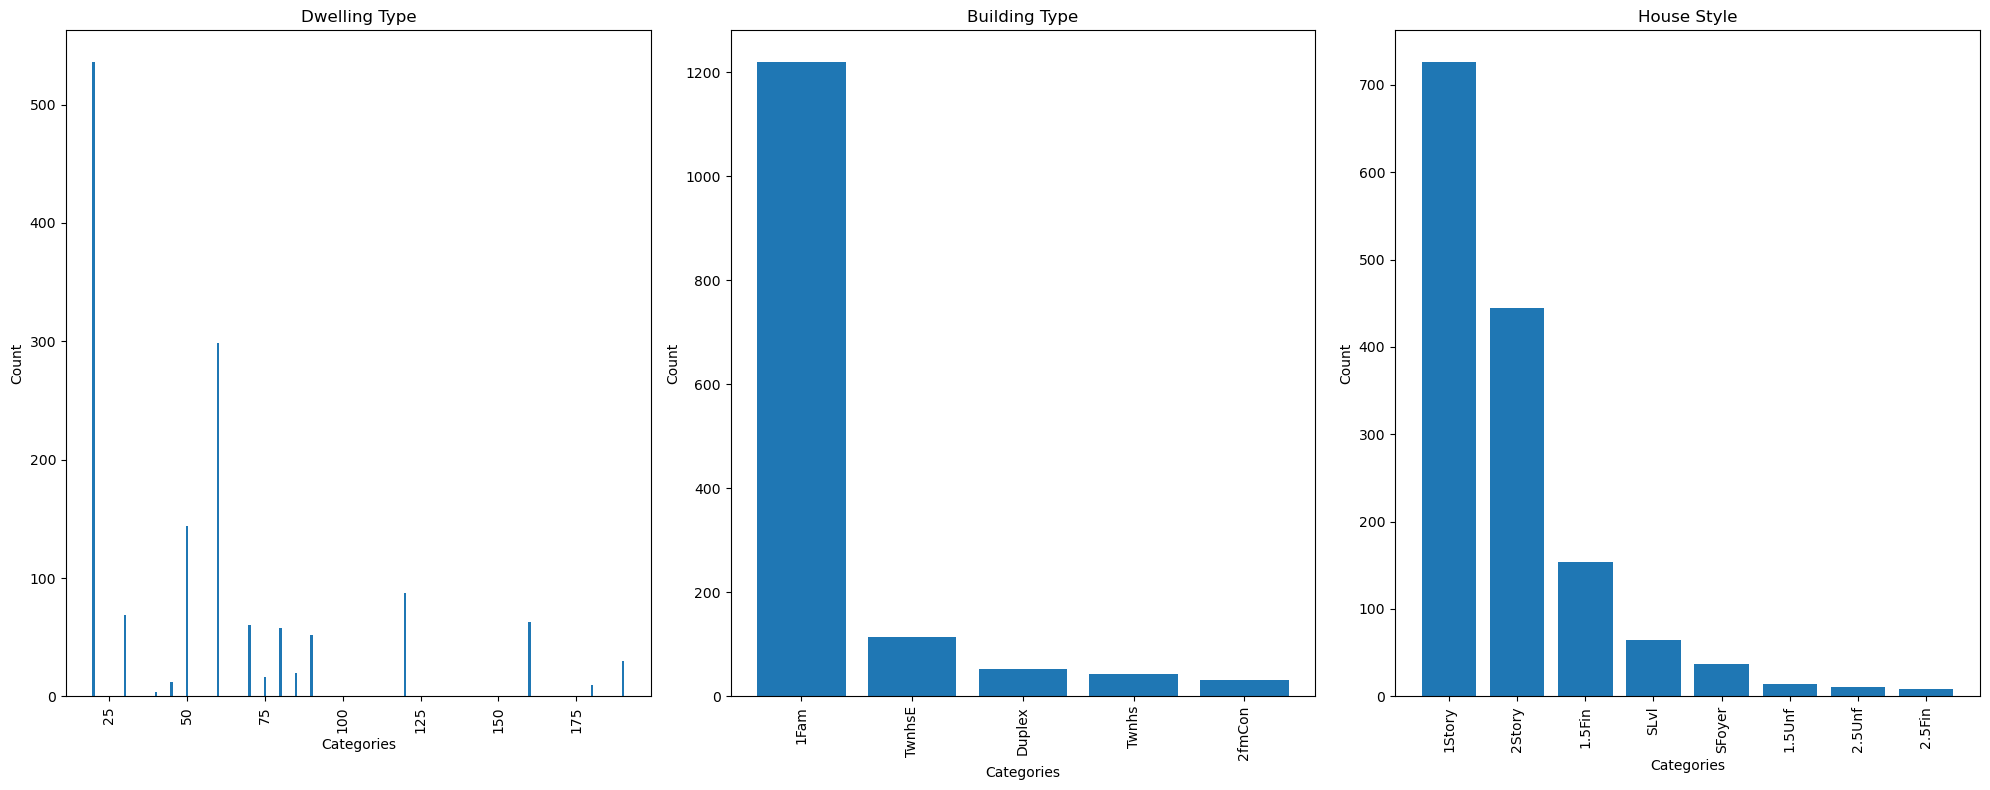

In [30]:
# Group 1: Dwelling Information : MSSubClass , BldgType, HouseStyle
# housingDataLabelled = housingData
# housingDataLabelled['MSSubClass'] = housingDataLabelled['MSSubClass'].astype(str).map({
#    "20": "1-Story Newer",
#     "30": "1-Story Older",
#     "40": "1-Story Finished Attic",
#     "45": "1-1/2 Story Unfinished",
#     "50": "1-1/2 Story Finished",
#     "60": "2-Story Newer",
#     "70": "2-Story Older",
#     "75": "2-1/2 Story",
#     "80": "Split or Multi-Level",
#     "85": "Split Foyer",
#     "90": "Duplex",
#     "120": "1-Story PUD Newer",
#     "150": "1-1/2 Story PUD",
#     "160": "2-Story PUD Newer",
#     "180": "PUD Multilevel",
#     "190": "2-Family Conversion",
# }) 
# housingDataLabelled['BldgType'] = housingDataLabelled['BldgType'].astype(str).map({
#    '1Fam': 'Single-family Detached',
#     '2FmCon': 'Two-family Conversion; originally built as one-family dwelling',
#     'Duplex': 'Duplex',
#     'TwnhsE': 'Townhouse End Unit',
#     'TwnhsI': 'Townhouse Inside Unit'
# }) 
# housingDataLabelled['HouseStyle'] = housingDataLabelled['HouseStyle'].astype(str).map({
#    '1Story': '1 Story',
#     '1.5Fin': '1.5 Fin',
#     '1.5Unf': '1.5 Unf',
#     '2Story': '2 Story',
#     '2.5Fin': '2.5 Fin',
#     '2.5Unf': '2.5 Unf',
#     'SFoyer': 'Split Foy',
#     'SLvl': 'Split Lvl'
# }) 

create_grouped_bar_chart(
                        [housingData['MSSubClass'],housingData['BldgType'],housingData['HouseStyle']], 
                         ["Dwelling Type" , "Building Type","House Style"]
                        )


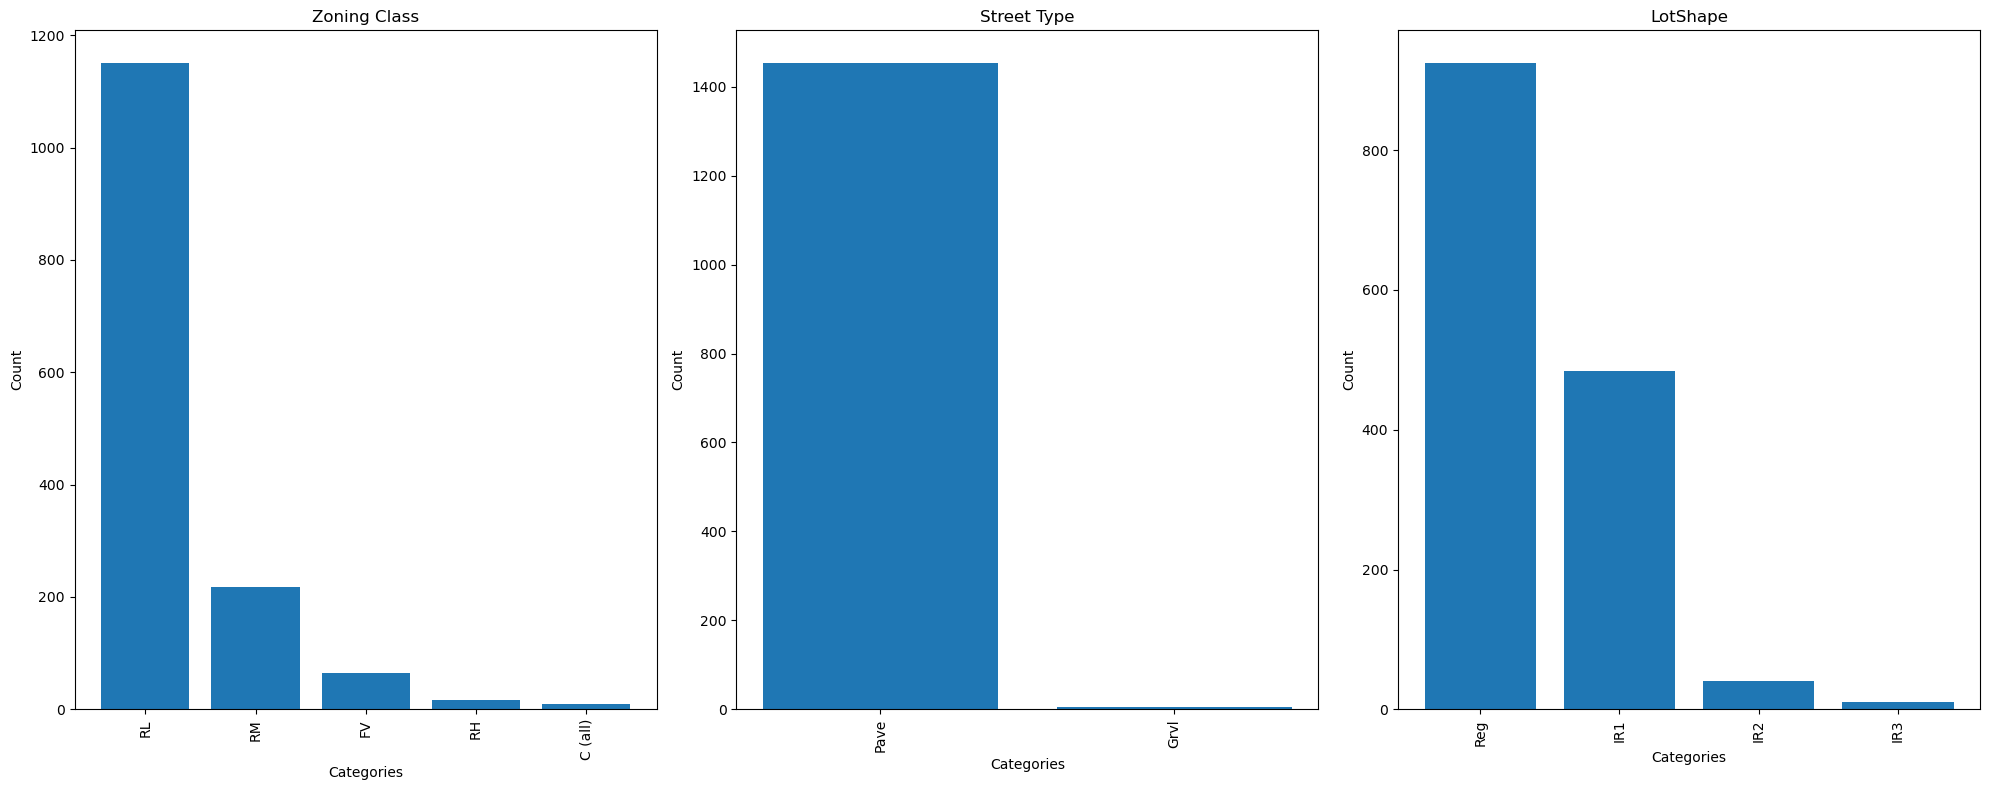

In [31]:
 
# housingDataLabelled['MSZoning'] = housingDataLabelled['MSZoning'].astype(str).map({
#    'A': 'Agriculture',
#     'C': 'Commercial',
#     'FV': 'Floating Village Residential',
#     'I': 'Industrial',
#     'RH': 'Residential High Density',
#     'RL': 'Residential Low Density',
#     'RP': 'Residential Low Density Park',
#     'RM': 'Residential Medium Density'
# })

# housingDataLabelled['Street'] = housingDataLabelled['Street'].astype(str).map({
#    'Grvl': 'Gravel',
#     'Pave': 'Paved',
#     'None': 'None'
# })

# housingDataLabelled['Alley'] = housingDataLabelled['Alley'].astype(str).map({
#    'Grvl': 'Gravel',
#     'Pave': 'Paved',
#     'None':'None'
# })

# housingDataLabelled['LotShape'] = housingDataLabelled['LotShape'].astype(str).map({
#    'Reg': 'Regular',
#     'IR1': 'Slightly irregular',
#     'IR2': 'Moderately Irregular',
#     'IR3': 'Irregular'
# })

create_grouped_bar_chart(
                        [housingData['MSZoning'],housingData['Street']
                         ,housingData['LotShape']], 
                         ["Zoning Class" , "Street Type","LotShape"]
                        )

### Step 6 - Bivariate Analysis

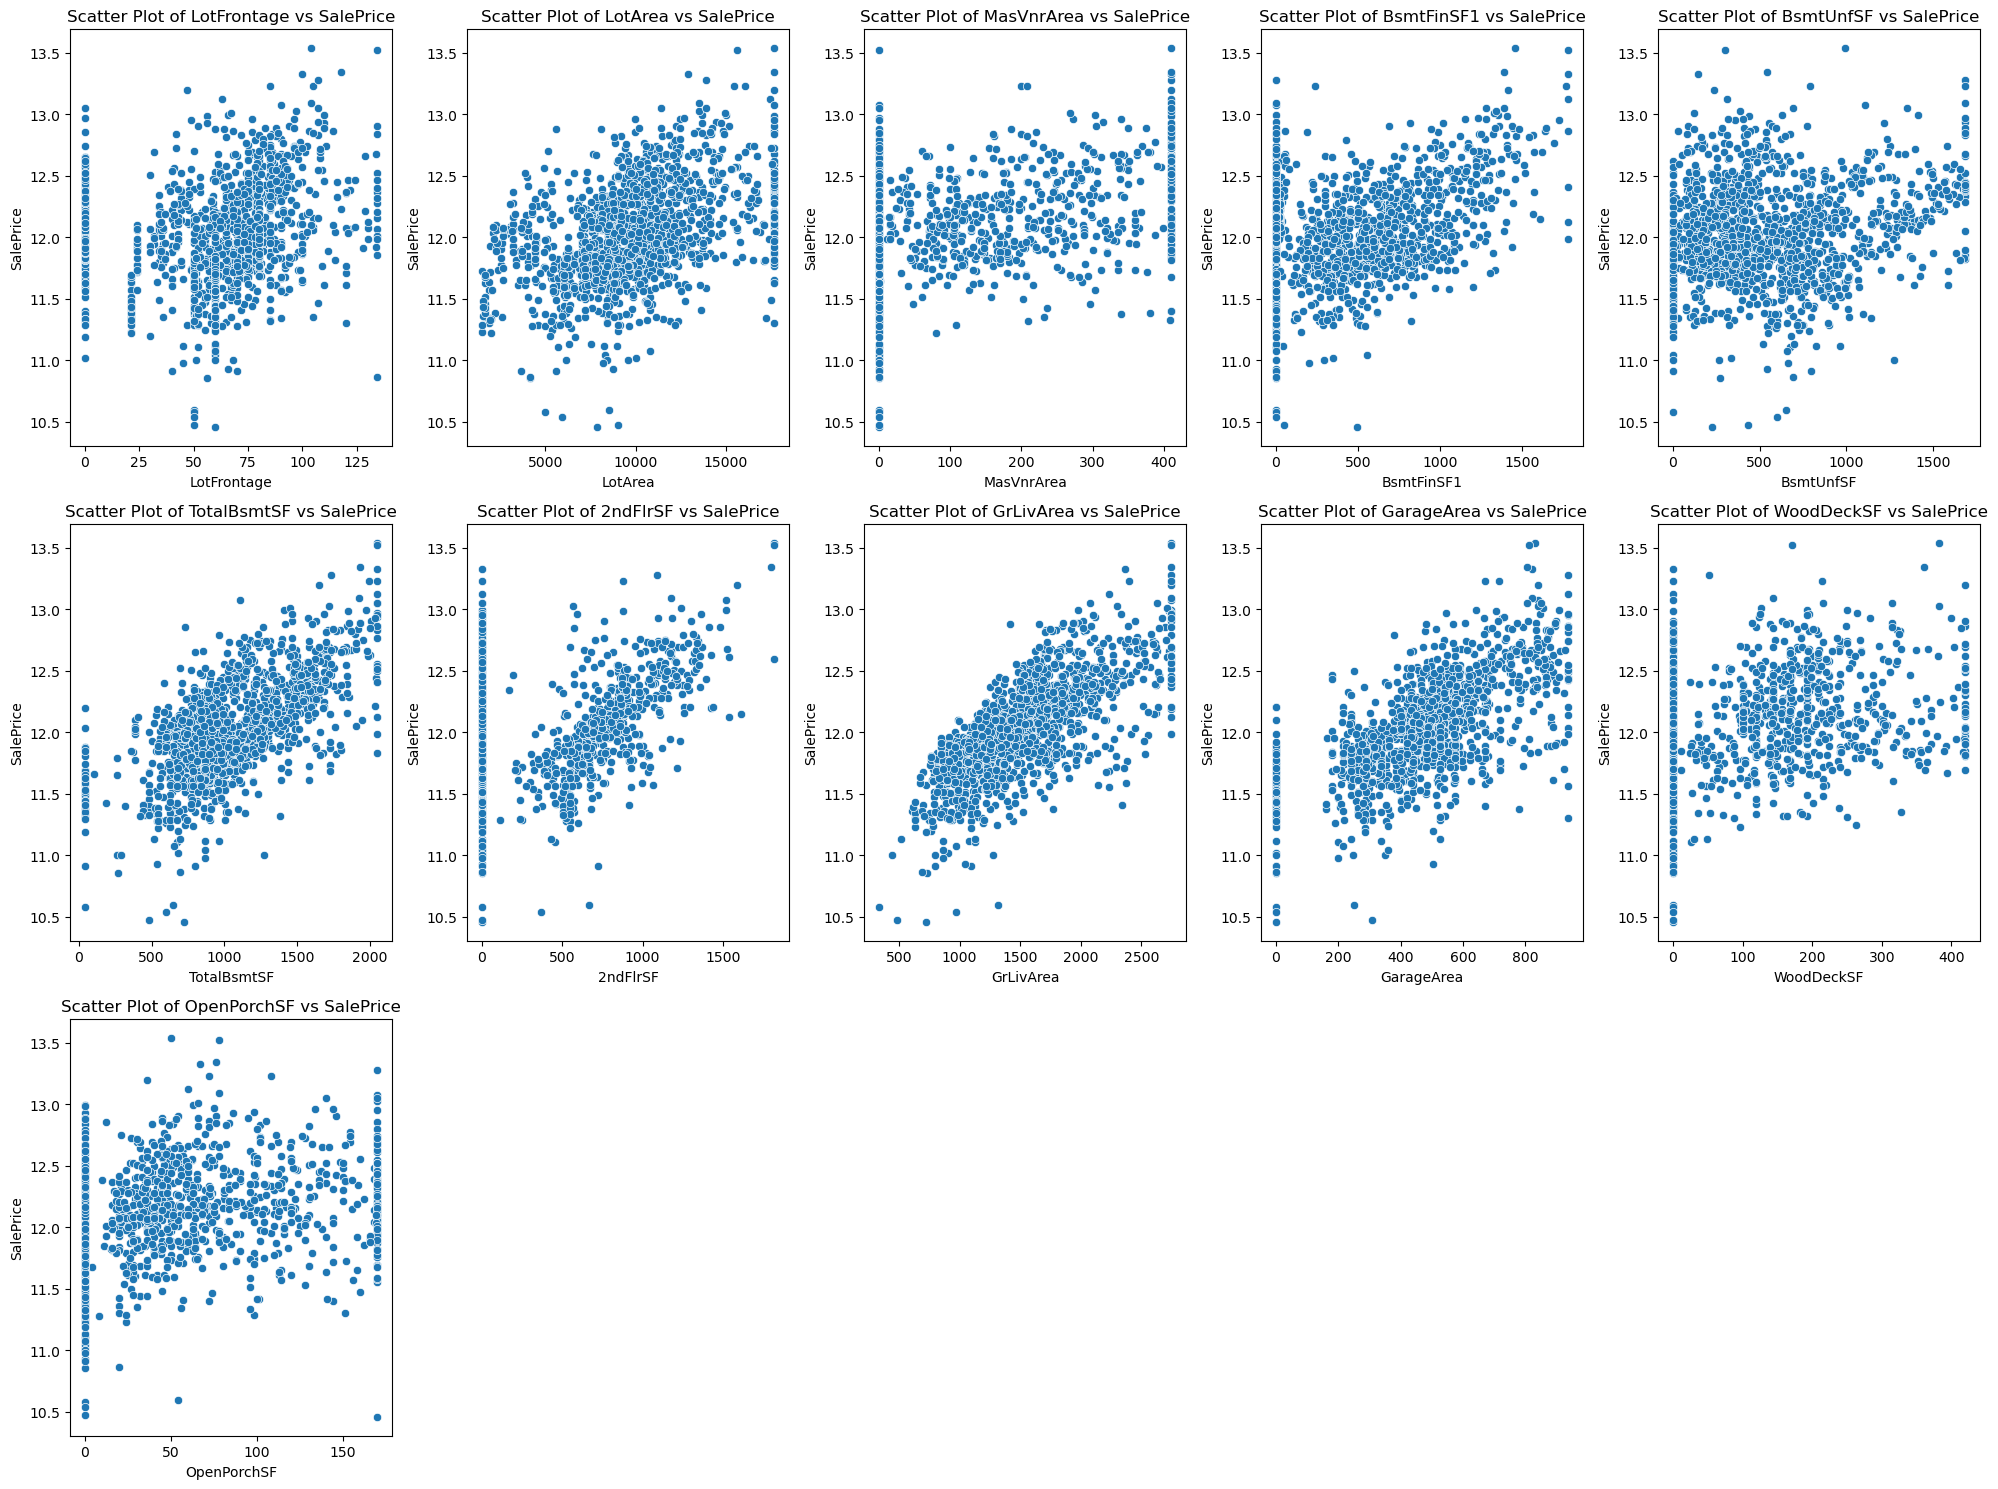

In [32]:
# Calculate the number of rows and columns needed
num_columns = 5
num_rows = math.ceil(len(housingData[numColumns].columns) / num_columns)

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * num_columns))

# Iterate over each column and create a separate scatter plot
for i, column in enumerate(housingData[numColumns].columns):
    row = i // num_columns
    col = i % num_columns
    
    # Select the appropriate subplot
    if num_rows > 1:
        ax = axes[row][col]
    else:
        ax = axes[col]
    
    # Create the scatter plot using seaborn
    sns.scatterplot(data=housingData[numColumns], x=column, y=housingData['SalePrice'], ax=ax)
    ax.set_title(f'Scatter Plot of {column} vs SalePrice')

# Remove any empty subplots
if len(housingData[numColumns].columns) < num_rows * num_columns:
    empty_subplots = num_rows * num_columns - len(housingData[numColumns].columns)
    if num_rows > 1:
        for i in range(empty_subplots):
            fig.delaxes(axes[-1][-1 - i])
    else:
        for i in range(empty_subplots):
            fig.delaxes(axes[-1 - i])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


- There is a pattern visible for almost all the numerical fields selected
- As the Area of the property is increasing , the sale price is going up 

### Derived Column 

In [33]:
housingData.head(100)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856,GasA,Ex,Y,SBrkr,854,1710.0,1,2,1,3,1,Gd,Typ,0,None,Attchd,2003.0,RFn,548.0,TA,TA,Y,0,61,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262,GasA,Ex,Y,SBrkr,0,1262.0,0,2,0,3,1,TA,Typ,1,TA,Attchd,1976.0,RFn,460.0,TA,TA,Y,298,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920,GasA,Ex,Y,SBrkr,866,1786.0,1,2,1,3,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,608.0,TA,TA,Y,0,42,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756,GasA,Gd,Y,SBrkr,756,1717.0,1,1,0,3,1,Gd,Typ,1,Gd,Detchd,1998.0,Unf,642.0,TA,TA,Y,0,35,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145,GasA,Ex,Y,SBrkr,1053,2198.0,1,2,1,4,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,836.0,TA,TA,Y,192,84,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,RL,0.0,9765.0,Pave,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,1993,1993,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Ex,Gd,PConc,Gd,Gd,No,ALQ,310.0,Unf,370.0,680,GasA,Gd,Y,SBrkr,790,1470.0,0,2,1,3,1,TA,Typ,1,TA,BuiltIn,1993.0,Fin,420.0,TA,TA,Y,232,63,4,2009,WD,Normal,12.128111
96,20,RL,78.0,10264.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,183.0,Gd,TA,PConc,Gd,TA,Av,ALQ,1162.0,Unf,426.0,1588,GasA,Ex,Y,SBrkr,0,1588.0,0,2,0,3,1,Gd,Typ,0,None,Attchd,1999.0,RFn,472.0,TA,TA,Y,158,29,8,2006,WD,Normal,12.273731
97,20,RL,73.0,10921.0,Pave,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,BrkFace,48.0,TA,TA,CBlock,TA,TA,No,Rec,520.0,Unf,440.0,960,GasA,TA,Y,FuseF,0,960.0,1,1,0,3,1,TA,Typ,0,None,Attchd,1965.0,Fin,432.0,TA,TA,P,120,0,5,2007,WD,Normal,11.458997
98,30,RL,85.0,10625.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,108.0,Unf,350.0,458,GasA,Fa,N,SBrkr,0,835.0,0,1,0,2,1,TA,Typ,0,None,Basment,1920.0,Unf,366.0,Fa,TA,Y,0,0,5,2010,COD,Abnorml,11.326596


In [34]:
import datetime
## There is an information in column YearBuilt, it would be intresting to know how much age of the property has impact on 
## our target variable "Sale Price"
current_year = datetime.datetime.now().year 
housingData['propertyAge'] = current_year - housingData['YearBuilt']
deleteColumns(['YearBuilt'])

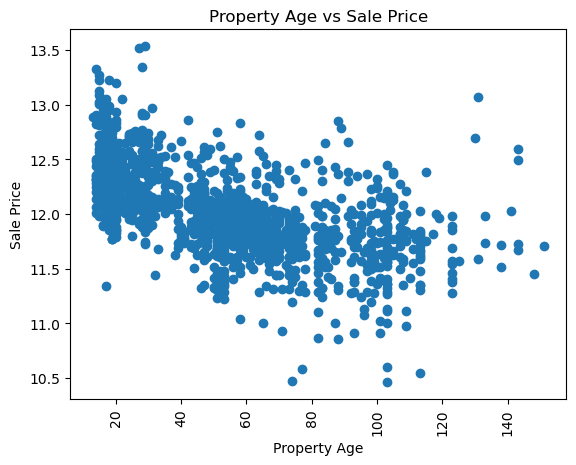

In [35]:
# Create the bar chart
plt.scatter(housingData['propertyAge'], housingData['SalePrice'])

# Set the axis labels and title
plt.xlabel('Property Age')
plt.ylabel('Sale Price')
plt.title('Property Age vs Sale Price')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


- As expected , it is visible in the plot above that newer propery have higher sale prices.
- As the age of propety is increasing , the sale price is getting reduced

In [36]:
## Lets divide all catColumns into ordinal and non-ordinal groups , since we would apply one hot encoding to non ordinal groups
## only 

ordinalCols = [ 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual',
               'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
               'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 
               'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir']
nonOrdinalCols = ['MSZoning', 'Street',  'LandContour', 'LotConfig', 
                  'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle',
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 
                  'Heating', 'Electrical', 'GarageType','PavedDrive',
                  'SaleType','SaleCondition']

### Label Encoding

In [37]:
housingData['LotShape'] = housingData['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housingData['Utilities'] = housingData['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housingData['LandSlope'] = housingData['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housingData['HouseStyle'] = housingData['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housingData['ExterQual'] = housingData['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housingData['ExterCond'] = housingData['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housingData['BsmtQual'] = housingData['BsmtQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housingData['BsmtCond'] = housingData['BsmtCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housingData['BsmtExposure'] = housingData['BsmtExposure'].map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housingData['BsmtFinType1'] = housingData['BsmtFinType1'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housingData['BsmtFinType2'] = housingData['BsmtFinType2'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housingData['HeatingQC'] = housingData['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housingData['CentralAir'] = housingData['CentralAir'].map({'N':0,'Y':1})
housingData['KitchenQual'] = housingData['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housingData['GarageFinish'] = housingData['GarageFinish'].map({'None':0,'Unf':1,'RFn':2,'Fin':3})
housingData['GarageQual'] = housingData['GarageQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housingData['GarageCond'] = housingData['GarageCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housingData['Functional'] = housingData['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housingData['FireplaceQu'] = housingData['FireplaceQu'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [38]:
housingData[ordinalCols].head()

,LotShape,Utilities,LandSlope,HouseStyle,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,CentralAir
0,3,3,0,3,3,2,4,3,1,6,1,4,3,0,0,2,3,3,1
1,3,3,0,0,2,2,4,3,4,5,1,4,2,0,3,2,3,3,1
2,0,3,0,3,3,2,4,3,2,6,1,4,3,0,3,2,3,3,1
3,0,3,0,3,2,2,3,4,1,5,1,3,3,0,4,1,3,3,1
4,0,3,0,3,3,2,4,3,3,6,1,4,3,0,3,2,3,3,1


### One Hot Encoding (Dummy Variable)

In [39]:
# print(housingData.shape)
# There are non-ordinal categorical values that needs to be converted to numerical value using dummy variable
# or one hot encoding technique. 
# These variables are : season,yr,mnth,weekday,weathersit
dummyVariables = nonOrdinalCols
dummyVariableDf = housingData[dummyVariables]
dummyVariableDf = pd.get_dummies(dummyVariableDf,drop_first=True)
dummyVariableDf.shape

(1460, 134)

In [40]:
dummies_to_drop = []
for feat in dummyVariableDf.columns:
    if dummyVariableDf[feat].value_counts()[0]/dummyVariableDf.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_

In [41]:
FinaldummyVariableDf = dummyVariableDf.drop(dummies_to_drop, axis=1)

In [42]:
# Now lets drop the original columns and add the above numeric values column to the original dataframe
finalhousingData = pd.concat([housingData,FinaldummyVariableDf],axis = 1)
finalhousingData.drop(dummyVariables,axis=1,inplace=True)
finalhousingData.shape

(1460, 92)

In [43]:
finalhousingData.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,propertyAge,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,3,7,5,2003,196.0,3,2,4,3,1,6,706.0,1,150.0,856,4,1,854,1710.0,1,2,1,3,1,3,0,0,0,2003.0,2,548.0,3,3,0,61,2,2008,12.247694,20,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1,0
1,20,80.0,9600.0,3,3,0,0,6,8,1976,0.0,2,2,4,3,4,5,978.0,1,284.0,1262,4,1,0,1262.0,0,2,0,3,1,2,0,1,3,1976.0,2,460.0,3,3,298,0,5,2007,12.109011,47,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,0
2,60,68.0,11250.0,0,3,0,3,7,5,2002,162.0,3,2,4,3,2,6,486.0,1,434.0,920,4,1,866,1786.0,1,2,1,3,1,3,0,1,3,2001.0,2,608.0,3,3,0,42,9,2008,12.317167,22,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1,0
3,70,60.0,9550.0,0,3,0,3,7,5,1970,0.0,2,2,3,4,1,5,216.0,1,540.0,756,3,1,756,1717.0,1,1,0,3,1,3,0,1,4,1998.0,1,642.0,3,3,0,35,2,2006,11.849398,108,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0
4,60,84.0,14260.0,0,3,0,3,8,5,2000,350.0,3,2,4,3,3,6,655.0,1,490.0,1145,4,1,1053,2198.0,1,2,1,4,1,3,0,1,3,2000.0,2,836.0,3,3,192,84,12,2008,12.429216,23,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1,0


### Train Test Split

In [44]:
trainTransactionDf, testTransactionDf = train_test_split(finalhousingData, train_size = 0.7, random_state = 100)
print(trainTransactionDf.shape)
print(testTransactionDf.shape)

(1021, 92)
(439, 92)


In [45]:
trainTransactionDf.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,propertyAge,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
318,60,90.0,9900.0,3,3,1,3,7,5,1993,256.0,3,2,4,3,4,6,987.0,1,360.0,1347,4,1,1274,2646.0,1,2,1,4,1,3,0,1,3,1993.0,2,656.0,3,3,340,60,4,2009,12.468437,30,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1,0
239,50,52.0,8741.0,3,3,0,2,6,4,1950,0.0,2,2,3,2,1,2,94.0,1,641.0,735,2,1,689,1487.0,0,1,1,3,1,2,0,1,4,1949.0,1,220.0,3,3,0,140,4,2010,11.635143,78,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0
986,50,59.0,5310.0,3,3,0,2,6,8,2003,0.0,2,3,3,2,1,1,0.0,1,485.0,485,3,1,634,1635.0,0,1,0,2,1,3,0,0,0,1950.0,1,255.0,2,3,394,0,6,2006,11.669929,113,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,0
1416,190,60.0,11340.0,3,3,0,3,4,6,1950,0.0,2,2,3,3,1,1,0.0,1,777.0,777,3,1,1044,2290.0,0,2,0,4,2,2,0,0,0,1971.0,1,560.0,3,3,0,0,4,2010,11.715866,138,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0
390,50,50.0,8405.0,3,3,0,2,5,8,1950,0.0,2,2,3,4,1,3,241.0,4,229.0,861,4,1,406,1367.0,1,1,0,4,1,2,0,0,0,1978.0,1,384.0,3,3,0,130,4,2008,11.686879,123,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,1,0


## Scaling

In [46]:
numColumns.append("propertyAge")
numColumns

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'propertyAge']

In [47]:
scaler = MinMaxScaler()
trainTransactionDf[numColumns] = scaler.fit_transform(trainTransactionDf[numColumns])
testTransactionDf[numColumns] = scaler.transform(testTransactionDf[numColumns])

trainTransactionDf.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,propertyAge,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
318,60,0.669145,0.519917,3,3,1,3,7,5,1993,0.62344,3,2,4,3,4,6,0.554300,1,0.213586,0.649254,4,1,0.700000,0.955999,1,2,1,4,1,3,0,1,3,1993.0,2,0.699174,3,3,0.809524,0.352941,4,2009,12.468437,0.123188,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1,0
239,50,0.386617,0.448339,3,3,0,2,6,4,1950,0.00000,2,2,3,2,1,2,0.052790,1,0.380303,0.344776,2,1,0.378571,0.454186,0,1,1,3,1,2,0,1,4,1949.0,1,0.234479,3,3,0.000000,0.823529,4,2010,11.635143,0.471014,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0
986,50,0.438662,0.236444,3,3,0,2,6,8,2003,0.00000,2,3,3,2,1,1,0.000000,1,0.287748,0.220398,3,1,0.348352,0.518266,0,1,0,2,1,3,0,0,0,1950.0,1,0.271783,2,3,0.938095,0.000000,6,2006,11.669929,0.724638,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,0
1416,190,0.446097,0.608850,3,3,0,3,4,6,1950,0.00000,2,2,3,3,1,1,0.000000,1,0.460991,0.365672,3,1,0.573626,0.801862,0,2,0,4,2,2,0,0,0,1971.0,1,0.596856,3,3,0.000000,0.000000,4,2010,11.715866,0.905797,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0
390,50,0.371747,0.427588,3,3,0,2,5,8,1950,0.00000,2,2,3,4,1,3,0.135346,4,0.135865,0.407463,4,1,0.223077,0.402230,1,1,0,4,1,2,0,0,0,1978.0,1,0.409273,3,3,0.000000,0.764706,4,2008,11.686879,0.797101,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,1,0


In [48]:
## Getting features (X) and target variable (Y)  from Training Set
x_trainTransactionDf = trainTransactionDf
y_trainTransactionDf = x_trainTransactionDf.pop('SalePrice')

x_testTransactionDf = testTransactionDf
y_testTransactionDf = x_testTransactionDf.pop('SalePrice')


In [49]:
print(x_trainTransactionDf.shape)
print(x_testTransactionDf.shape)

(1021, 91)
(439, 91)


In [50]:
x_testTransactionDf.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,propertyAge,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
1436,20,0.446097,0.464334,3,3,0,0,4,6,1971,0.000000,2,2,3,3,1,5,0.345946,1,0.147137,0.408955,2,1,0.000000,0.184446,0,1,0,3,1,2,0,0,0,1974.0,1,0.562750,3,3,0.000000,0.000000,5,2007,0.282609,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,1,0,1,1,0
57,60,0.661710,0.627687,0,3,0,3,7,5,2004,0.000000,3,2,4,3,1,1,0.000000,1,0.510234,0.406965,4,1,0.472527,0.555068,0,2,1,3,1,3,0,0,0,2004.0,2,0.602185,3,3,0.000000,0.411765,8,2006,0.043478,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,1,1,0,0,0,1,0,1,1,0
780,20,0.468401,0.394855,3,3,0,0,7,5,1996,0.092542,2,2,4,4,1,1,0.000000,1,0.733907,0.594527,3,1,0.000000,0.352871,0,2,0,3,1,2,0,1,3,1995.0,3,0.428457,3,3,0.523810,0.123529,6,2007,0.108696,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1,0
382,60,0.587361,0.479465,0,3,0,3,7,5,2006,0.000000,3,2,4,3,3,1,0.000000,1,0.557105,0.446269,4,1,0.471429,0.588407,0,2,1,3,1,3,0,0,0,2006.0,2,0.681055,3,3,0.342857,0.311765,4,2007,0.028986,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,1,1,0,0,0,1,0,1,1,0
1170,80,0.565056,0.518682,3,3,0,7,6,6,1977,0.000000,2,2,3,3,3,5,0.293155,1,0.340552,0.524378,2,1,0.000000,0.294420,1,1,0,3,1,2,0,1,1,1977.0,3,0.381561,3,3,0.483333,0.000000,7,2008,0.239130,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,0


In [51]:
# Check for columns containing "None"
# columns_with_none = x_trainTransactionDf.isin(['Fa']).any()
columns_with_none = x_trainTransactionDf.isna().any()

# Filter the column names with "None" values
columns_containing_none = columns_with_none[columns_with_none].index.tolist()

# Display the columns containing "None"
print("Columns containing 'None':")
print(columns_containing_none)

 

Columns containing 'None':
[]


### RFE Feature Selection

In [52]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(x_trainTransactionDf, y_trainTransactionDf)

# # # running RFE
rfe = RFE(estimator=lm, n_features_to_select=100)  
rfe = rfe.fit(x_trainTransactionDf, y_trainTransactionDf)

In [53]:
rfeColSelected = x_trainTransactionDf.columns[rfe.support_]

In [54]:
finalTrainTransactionDf_RfeSel = x_trainTransactionDf[rfeColSelected]
finalTestTransactionDf_RfeSel = x_testTransactionDf[rfeColSelected] 

## Model Building and Evaluation

In [55]:
print(finalTrainTransactionDf_RfeSel.shape)
print(y_trainTransactionDf.shape)

(1021, 91)
(1021,)


### Ridge 

In [56]:
# alphas = np.logspace(1, 10, 100)
# print("Alpha values:", alphas)

In [57]:
# list of alphas to tune
params = {'alpha':  
          [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridgeModelCv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridgeModelCv.fit(finalTrainTransactionDf_RfeSel, y_trainTransactionDf)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
finalTrainTransactionDf_RfeSel.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,propertyAge,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
318,60,0.669145,0.519917,3,3,1,3,7,5,1993,0.62344,3,2,4,3,4,6,0.554300,1,0.213586,0.649254,4,1,0.700000,0.955999,1,2,1,4,1,3,0,1,3,1993.0,2,0.699174,3,3,0.809524,0.352941,4,2009,0.123188,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1,0
239,50,0.386617,0.448339,3,3,0,2,6,4,1950,0.00000,2,2,3,2,1,2,0.052790,1,0.380303,0.344776,2,1,0.378571,0.454186,0,1,1,3,1,2,0,1,4,1949.0,1,0.234479,3,3,0.000000,0.823529,4,2010,0.471014,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0
986,50,0.438662,0.236444,3,3,0,2,6,8,2003,0.00000,2,3,3,2,1,1,0.000000,1,0.287748,0.220398,3,1,0.348352,0.518266,0,1,0,2,1,3,0,0,0,1950.0,1,0.271783,2,3,0.938095,0.000000,6,2006,0.724638,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,0
1416,190,0.446097,0.608850,3,3,0,3,4,6,1950,0.00000,2,2,3,3,1,1,0.000000,1,0.460991,0.365672,3,1,0.573626,0.801862,0,2,0,4,2,2,0,0,0,1971.0,1,0.596856,3,3,0.000000,0.000000,4,2010,0.905797,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0
390,50,0.371747,0.427588,3,3,0,2,5,8,1950,0.00000,2,2,3,4,1,3,0.135346,4,0.135865,0.407463,4,1,0.223077,0.402230,1,1,0,4,1,2,0,0,0,1978.0,1,0.409273,3,3,0.000000,0.764706,4,2008,0.797101,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,1,0


In [59]:
ridge_cv_results = pd.DataFrame(ridgeModelCv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
12,0.9,-0.076441,-0.086719,1
11,0.8,-0.076368,-0.086721,2
13,1.0,-0.076515,-0.086723,3
10,0.7,-0.076298,-0.086723,4
9,0.6,-0.076229,-0.086727,5
8,0.5,-0.076165,-0.086742,6
7,0.4,-0.076108,-0.086758,7
6,0.3,-0.076061,-0.086785,8
5,0.2,-0.076026,-0.086824,9
4,0.1,-0.076004,-0.086876,10


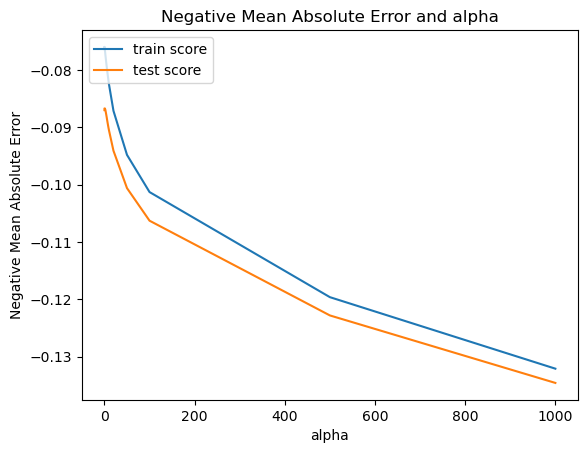

In [60]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [61]:
# get the best estimator for lambda
print(ridgeModelCv.best_estimator_)

Ridge(alpha=0.9)


In [62]:
# y_trainTransactionDf = scaler.transform(y_testTransactionDf)

In [78]:
alpha = 0.9
ridge = Ridge(alpha=alpha)

ridge.fit(finalTrainTransactionDf_RfeSel, y_trainTransactionDf)
ridge.coef_


array([-3.50316843e-04,  1.33046439e-02,  1.41970797e-01, -1.22562656e-03,
        4.67398724e-02,  3.97397445e-02,  7.30017037e-04,  5.59703755e-02,
        4.22269677e-02,  8.92549599e-04, -1.16905463e-03, -5.18895649e-03,
       -1.45635932e-02, -1.45842574e-03, -1.80671380e-02,  1.57640996e-02,
        4.24758208e-03,  5.53807714e-02, -2.95851230e-03, -5.00161964e-02,
        3.00957372e-01,  9.50592614e-03,  6.64478504e-02,  4.07492811e-02,
        5.70425774e-01,  3.36013748e-02,  2.63015548e-02,  1.13632852e-02,
        6.96491294e-03, -3.05378168e-02,  1.86837162e-02, -3.25362416e-02,
        5.15368247e-03,  1.13590222e-02, -5.52655618e-05,  9.37348372e-03,
        1.03621575e-01,  3.43766666e-02, -3.52708193e-03,  2.55758519e-02,
        5.66208516e-03, -5.64454295e-04, -4.33641105e-03, -1.44176275e-01,
        7.70283464e-02,  2.23425459e-02,  6.79638748e-02,  1.50155434e-02,
        3.62147963e-02,  4.10281823e-04, -2.95598925e-02, -8.57004204e-02,
       -2.43089302e-02, -

In [79]:
#Lets calculate the mean squared error value
mse = mean_squared_error(y_trainTransactionDf, ridge.predict(finalTrainTransactionDf_RfeSel))
print("The mean squared error value is ",mse)

The mean squared error value is  0.012698576591567567


In [80]:
from sklearn import metrics

In [81]:
# predicting the R2 value of train data
y_train_pred = ridge.predict(finalTrainTransactionDf_RfeSel)
r2_train = metrics.r2_score(y_true=y_trainTransactionDf, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

The r2 value of train data is  0.9191916518523747


In [82]:
#predicting the R2 value of test data
y_test_pred = ridge.predict(finalTestTransactionDf_RfeSel )
r2_test = metrics.r2_score(y_true=y_testTransactionDf, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The r2 value of test data is  0.8918331897966562


In [83]:
finalTrainTransactionDf_RfeSel.shape

(1021, 91)

In [115]:
# house_pricing_ridge = pd.DataFrame({'Features':finalTrainTransactionDf_RfeSel.columns, 'Coefficient':ridge.coef_.round(4)})
# house_pricing_ridge.reset_index(drop=True, inplace=True)
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef= pd.Series(ridge.coef_, index= finalTrainTransactionDf_RfeSel.columns)
top_10_ridge=  ridge_coef[abs(ridge_coef).nlargest(25).index]
top_10_ridge_rounded = top_10_ridge.round(2)
top_10_ridge_rounded.iloc[(-top_10_lasso_rounded.abs()).argsort()] 

GrLivArea               0.57
TotalBsmtSF             0.30
LotArea                 0.14
propertyAge            -0.14
Neighborhood_Somerst    0.11
GarageArea              0.10
BsmtFinSF1              0.06
Condition1_Norm         0.08
OverallQual             0.06
MSZoning_RL             0.08
CentralAir              0.07
Neighborhood_Edwards   -0.09
Neighborhood_NridgHt    0.05
SaleType_New            0.04
SaleCondition_Normal    0.05
Exterior1st_Wd Sdng    -0.05
Condition2_Norm         0.07
RoofStyle_Gable        -0.05
BldgType_TwnhsE         0.05
Street_Pave             0.07
Exterior1st_Plywood    -0.04
Heating_GasA           -0.05
BsmtUnfSF              -0.05
Utilities               0.05
Exterior1st_HdBoard    -0.05
dtype: float64

In the Above Ridge regression model, the top influential features on the target variable are GrLivArea and TotalBsmtSF, both having a strong positive impact. Conversely, property age, certain neighborhood categories (Neighborhood_Edwards and Exterior1st_Wd Sdng) have a negative impact, while other features in the list have relatively minor effects on the target variable.

## Lasso

In [85]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(finalTrainTransactionDf_RfeSel, y_trainTransactionDf)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.001,-0.079018,-0.084737,1
0,0.0001,-0.076114,-0.086076,2
2,0.01,-0.117097,-0.121172,3
3,0.05,-0.150032,-0.151689,4
4,0.1,-0.164104,-0.165030,5
5,0.2,-0.202597,-0.203917,6
6,0.3,-0.234921,-0.236494,7
7,0.4,-0.235304,-0.236850,8
8,0.5,-0.235673,-0.237155,9
9,0.6,-0.236129,-0.237541,10


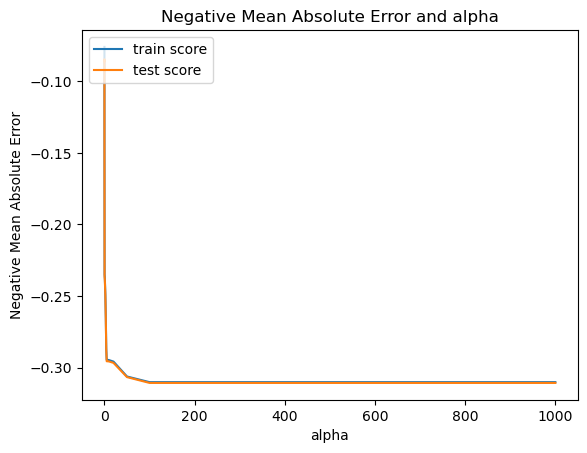

In [91]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [138]:
# get the best estimator for lambda
print(model_cv.best_estimator_)

Lasso(alpha=0.001)


In [92]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(finalTrainTransactionDf_RfeSel, y_trainTransactionDf) 

Lasso(alpha=0.001)

In [93]:
lasso.coef_

array([-3.56575629e-04,  0.00000000e+00,  1.15984924e-01, -1.25554796e-03,
        0.00000000e+00,  2.28605922e-02, -1.03903952e-03,  6.32466673e-02,
        3.68135035e-02,  1.18503426e-03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  4.22705740e-03, -1.47329375e-02,  1.66879785e-02,
        7.65892081e-03,  7.31921361e-02,  9.59970830e-05, -0.00000000e+00,
        1.94367975e-01,  1.11621150e-02,  4.59098935e-02,  0.00000000e+00,
        5.97981848e-01,  3.24905325e-02,  2.56726128e-02,  1.44001512e-02,
        3.28697511e-03, -4.40062634e-03,  1.81110869e-02, -2.85011292e-02,
        0.00000000e+00,  1.52765008e-02, -3.53188669e-06,  1.19436635e-02,
        8.52348267e-02,  1.41078138e-02,  0.00000000e+00,  1.55732851e-02,
        8.62694086e-05, -4.48914011e-04, -5.13683529e-03, -1.01458996e-01,
        5.53098527e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.14647620e-02, -0.00000000e+00, -2.69690432e-03, -5.49536401e-02,
       -0.00000000e+00,  

In [123]:
lasso_coef= pd.Series(lasso.coef_, index= finalTrainTransactionDf_RfeSel.columns)
top_10_lasso=  lasso_coef[abs(ridge_coef).nlargest(25).index]
top_10_lasso_rounded = top_10_lasso.round(2)
top_10_lasso_rounded.iloc[(-top_10_lasso_rounded.abs()).argsort()]

GrLivArea               0.60
TotalBsmtSF             0.19
LotArea                 0.12
propertyAge            -0.10
Neighborhood_Somerst    0.10
GarageArea              0.09
BsmtFinSF1              0.07
Condition1_Norm         0.06
OverallQual             0.06
MSZoning_RL             0.06
CentralAir              0.05
Neighborhood_Edwards   -0.05
Neighborhood_NridgHt    0.04
SaleType_New            0.04
SaleCondition_Normal    0.03
Exterior1st_Wd Sdng    -0.02
Condition2_Norm         0.01
RoofStyle_Gable        -0.01
BldgType_TwnhsE         0.01
Street_Pave             0.00
Exterior1st_Plywood    -0.00
Heating_GasA           -0.00
BsmtUnfSF              -0.00
Utilities               0.00
Exterior1st_HdBoard    -0.00
dtype: float64

The Above Lasso regression model indicates that living area above ground (GrLivArea) and total basement area (TotalBsmtSF) have the strongest positive influence on the target variable, while property age have a negative  impact, respectively. Other features in the list have relatively minor effects or no impact on the target variable "Sales Price".

In [124]:
## Since our both models are ready , lets calculate the predicted value for train and test data as well

y_pred_ridge_train = ridge.predict(finalTrainTransactionDf_RfeSel)
y_pred_lasso_train = lasso.predict(finalTrainTransactionDf_RfeSel)

y_pred_ridge_test = ridge.predict(finalTestTransactionDf_RfeSel)
y_pred_lasso_test = lasso.predict(finalTestTransactionDf_RfeSel)

Error distribution in train dataset


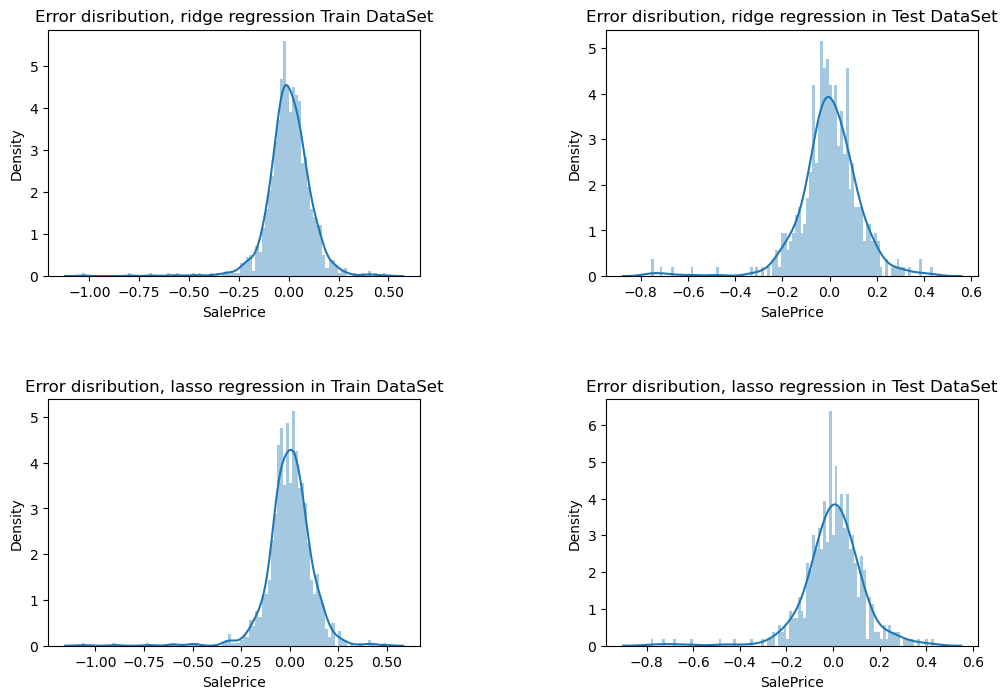

In [137]:
print('Error distribution in train dataset')
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
sns.distplot((y_trainTransactionDf - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression Train DataSet')

plt.subplot(2, 2, 2)
sns.distplot((y_testTransactionDf - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression in Test DataSet')

plt.subplot(2, 2, 3)
sns.distplot((y_trainTransactionDf - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression in Train DataSet')

plt.subplot(2, 2, 4)
sns.distplot((y_testTransactionDf - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression in Test DataSet')

plt.subplots_adjust(wspace = .5)
plt.subplots_adjust(hspace = .5)

In [119]:
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_trainTransactionDf, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_trainTransactionDf, y_pred_lasso_train))

r2_score in train dataset
r2_score for ridge: 0.9191916518523747
r2_score for lasso: 0.913309800346884


In [120]:
print('r2_score in test dataset')
print('r2_score for ridge:', r2_score(y_testTransactionDf, y_pred_ridge_test))
print('r2_score for lasso:', r2_score(y_testTransactionDf, y_pred_lasso_test))

r2_score in test dataset
r2_score for ridge: 0.8918331897966562
r2_score for lasso: 0.8926633402751757


The R2 scores for both models are relatively close, and both models are generalizing well to the test dataset. However, Ridge regression has a slightly higher R2 score on the train dataset compared to Lasso regression, indicating that Ridge might be slightly overfitting the training data. On the other hand, Lasso regression has a slightly higher R2 score on the test dataset, indicating it is performing slightly better on unseen data.

Given the similar performance, we would be choosing the Lasso regression model. The Lasso model tends to perform feature selection by driving some coefficients to exactly zero, which can lead to a simpler and more interpretable model.


## Conclusion

Here is the summarized information for both of our models : 
    
    - Ridge 
        - Lambda or Alpha Value Selected 
               alpha - 0.9 
               
        - R2 Scores        
            - Train Data : 0.9191916518523747
            - Test Data  : 0.8918331897966562
        
        Top 5 Features based on Ridge Regession Model 
            GrLivArea               0.57  (Above grade (ground) living area square feet)
            TotalBsmtSF             0.30  (Total square feet of basement area)
            LotArea                 0.14  (Lot size in square feet)
            propertyAge            -0.14  (Age of the property)
            Neighborhood_Somerst    0.11  (Physical locations within Ames city limits Near to Somerset ) 
        
        
     - Lasso 
     
            - Lambda or Alpha Value Selected 
                   alpha - 0.001                   
                   
            - R2 Scores     
                - Train Data : 0.913309800346884
                - Test Data  : 0.8926633402751757

           Top 5 Features based on Lasso Regession Model 
                GrLivArea               0.60  (Above grade (ground) living area square feet)
                TotalBsmtSF             0.19  (Total square feet of basement area)
                LotArea                 0.12  (Lot size in square feet)
                propertyAge            -0.10  (Age of the property)
                Neighborhood_Somerst    0.10  (Physical locations within Ames city limits Near to Somerset ) 

        

### Based on the above , we have choosen lasso as our final model because of two reasons :
      - It is performing slightly better in test data ( unseen Data) as compared to Ridge
      - It performs feature selection by driving coefficents to excatly zero thereby simplifying the model